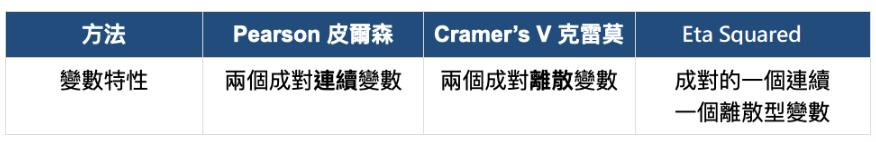

連續 vs 連續
1. Pearson 相關係數：量測兩個連續型變數之間，線性相依的程度

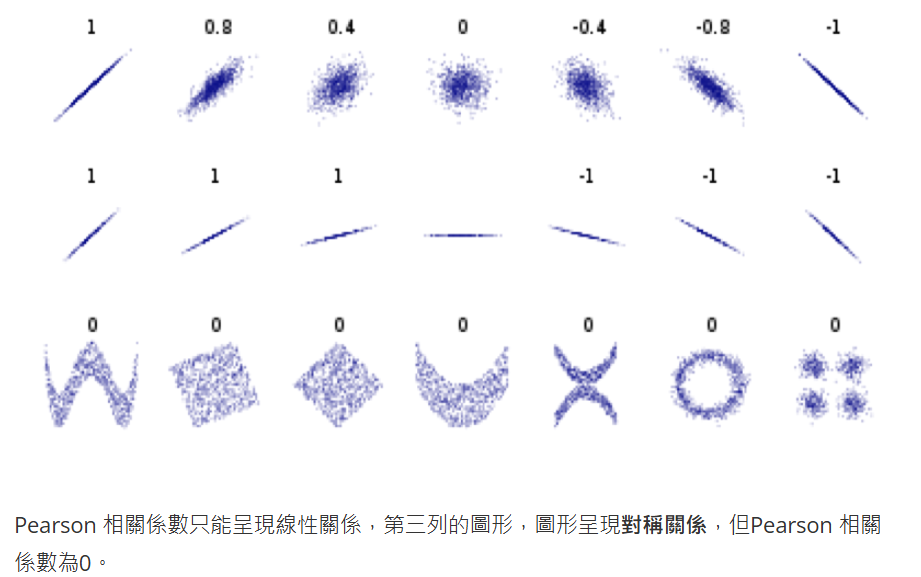

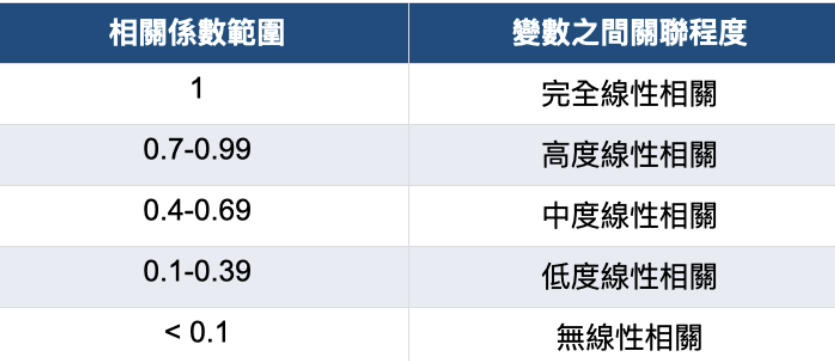

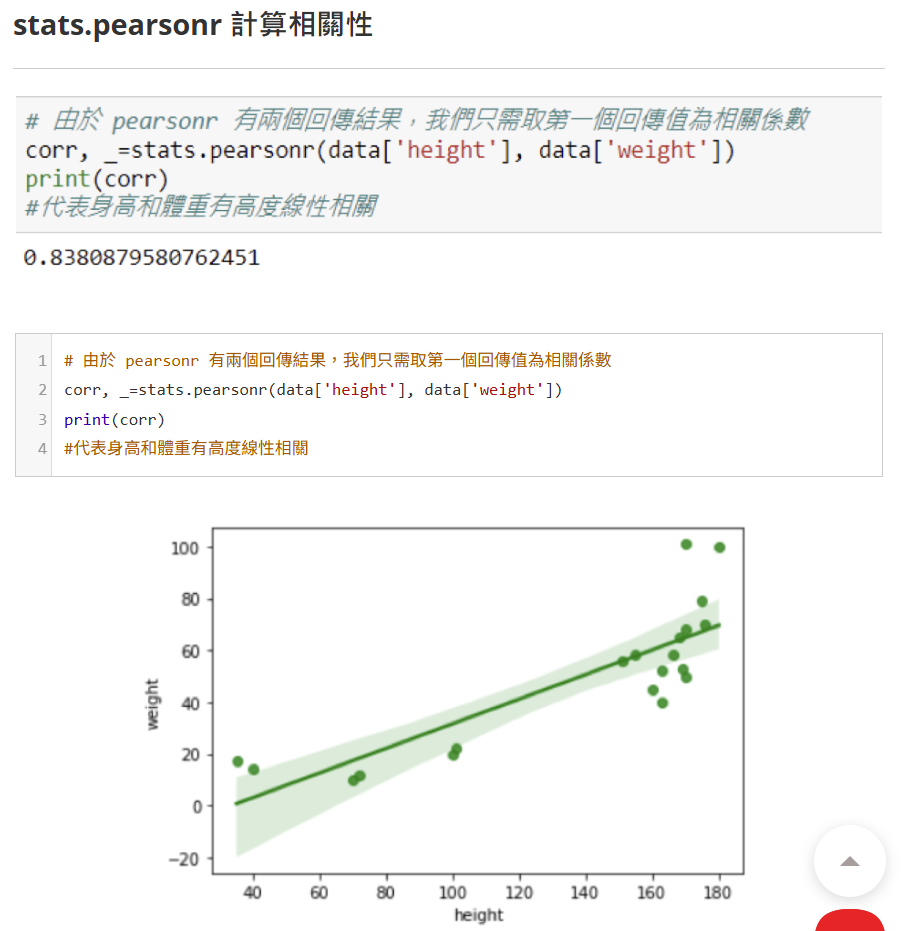


離散 vs 離散
             
Cramer’s V 係數 運用卡方檢定的結果來運算出一 個可以估算離散型變數的相關性的指標

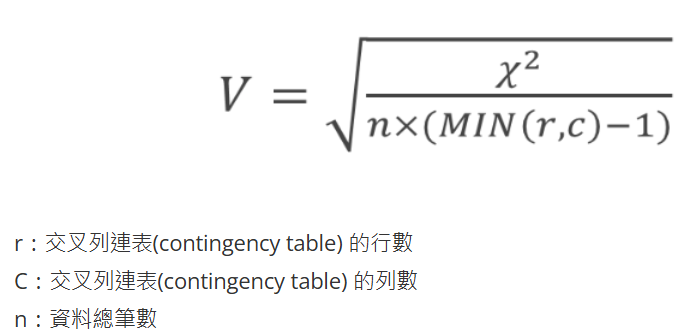

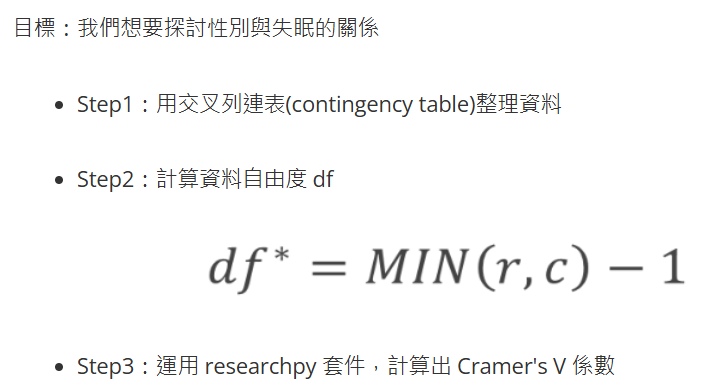

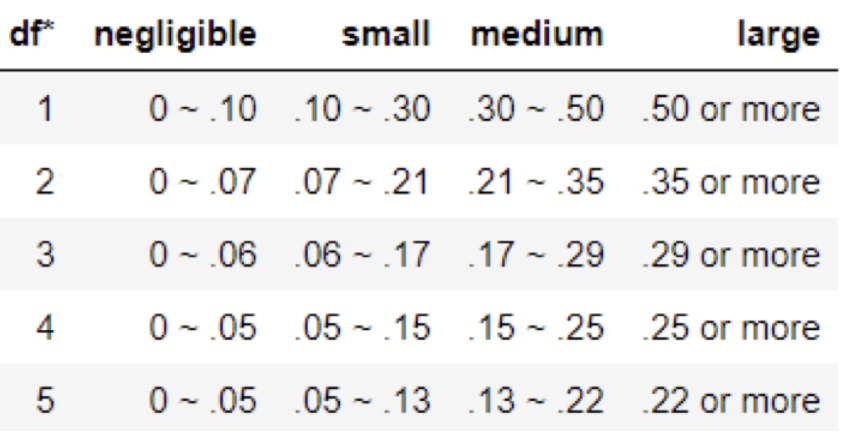




In [ ]:
# 產生交叉表：列出 sex（性別）與 insomnia（是否失眠）之間的次數分布
contTable = pd.crosstab(data['sex'], data['insomnia'])
contTable  # 查看列聯表

# 計算自由度 df = min(行數, 列數) - 1（Cramér’s V 後續要用）
df = min(contTable.shape[0], contTable.shape[1]) - 1
df  # 顯示自由度

# 用 researchpy 的 crosstab 函數進行交叉表分析並進行卡方檢定
# test='chi-square'：指定使用卡方檢定 (chi-square test of independence)
import researchpy
crosstab, res = researchpy.crosstab(data['sex'], data['insomnia'], test='chi-square')

# 印出卡方檢定結果中的 Cramér's V 值（衡量分類變數間的關聯程度）
# 注意：res.loc[2,'results'] 為結果表中 Cramér's V 所在列的值
print("Cramer's value is", res.loc[2, 'results'])

# 解釋 Cramér's V 的強度（需搭配自由度來評估關聯強度）
# 你需事先定義 valiate_CramerV(df, V) 函數，用來根據 V 值與自由度給出強度判斷
valiate_CramerV(df, res.loc[2, 'results'])


離散 vs 連續
1. eta-squared：一個離散型變數和連續型變數的相關性

In [ ]:
#!pip install pingouin
# ⬆️ 若尚未安裝 pingouin 套件，請先取消註解這行來安裝

import pingouin as pg  # 匯入 pingouin 套件，用於統計分析（特別是 ANOVA）

# 執行單因子變異數分析（ANOVA）
# dv='weight'：連續型變數（被解釋的變數）
# between='insomnia'：分類變數（解釋變數）
# data=data：資料來源
# detailed=True：輸出更多統計細節
aov = pg.anova(dv='weight', between='insomnia', data=data, detailed=True)
aov  # 顯示 ANOVA 分析結果表格（包含 SS、DF、MS、F、p 等）

# 計算 Eta Squared（η²）效果量，用來衡量 insomnia 對 weight 的解釋力
# eta² = 組間平方和 / (組間平方和 + 組內平方和)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq  # 顯示計算出來的 eta squared 數值

# 自訂一個函數，根據 eta squared 數值給出等級判斷
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'  # 幾乎沒有影響力
    elif etaSq < .06:
        qual = 'Small'       # 小影響
    elif etaSq < .14:
        qual = 'Medium'      # 中等影響
    else:
        qual = 'Large'       # 影響力大
    return(qual)

# 📌 呼叫上面函數，輸出該 eta squared 數值的解釋等級
judgment_etaSq(etaSq)
